In [59]:
import dezero
from dezero import Variable, optimizers
import numpy as np
import dezero.functions as F
import dezero.models as Models
import dezero.optimizers as optimizers

sigma = 0.2
data_size = 100
x = np.random.rand(data_size, 1)
y = np.sin(2 * np.pi * x) + sigma * np.random.randn(data_size, 1)

model = Models.MLP((10, 32, 64, 1))
_ = model(x)

In [60]:
print(model.summary())

😸Model Summary:
type: MLP
Layer		Parameter
Linear		(1, 10)
			(10,)
____________________________________________________________
Linear		(10, 32)
			(32,)
____________________________________________________________
Linear		(32, 64)
			(64,)
____________________________________________________________
Linear		(64, 1)
			(1,)
____________________________________________________________
____________________________________________________________
total parameter: 2549


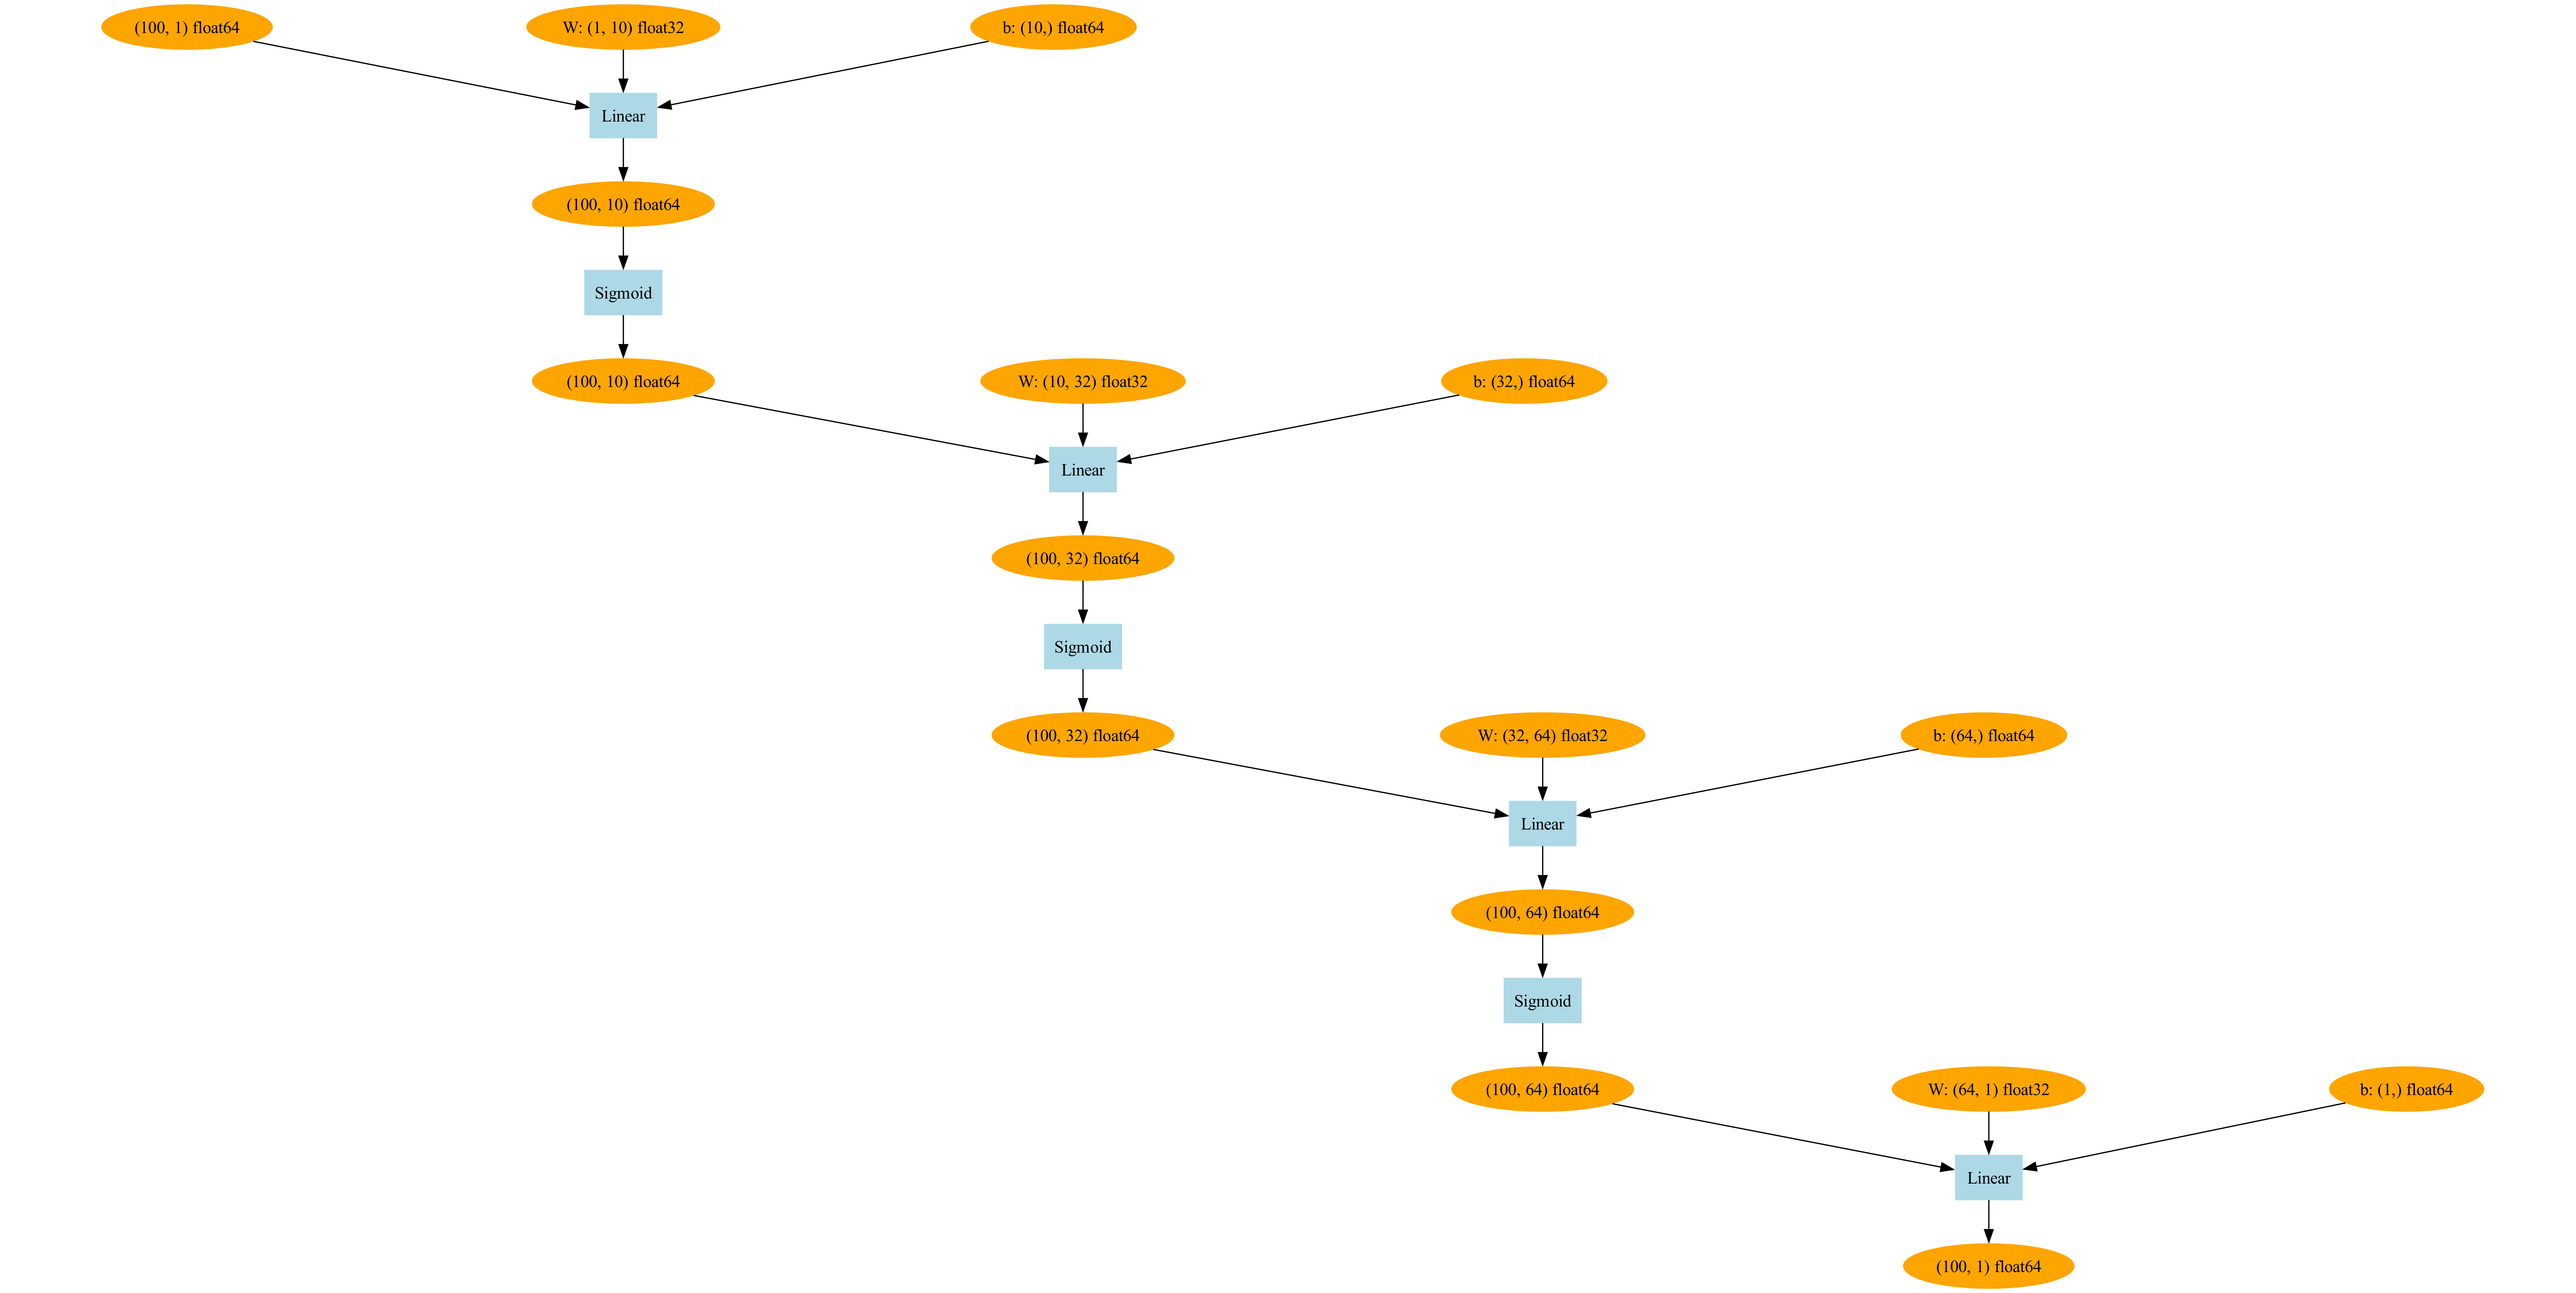

In [61]:
model.plot(x)

In [62]:
max_iter = 10000
optimizer = optimizers.Adam().setup(model)
losses = []
for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y_pred, y)
    model.cleargrads()
    loss.backward()
    optimizer.update()
    if i % 10 == 0:
        print(i, loss.data)
        losses.append(loss.data)

0 0.668194323996725
10 0.5048873063805142
20 0.504306045760569
30 0.501011274770427
40 0.49657868340518396
50 0.4959312545897023
60 0.49461653142384543
70 0.493169245514271
80 0.4917098570483007
90 0.4900662139266237
100 0.4881589253001157
110 0.48592946732288234
120 0.4833041953659485
130 0.48019147803798473
140 0.4764807487033434
150 0.47203902014755283
160 0.46670686286388774
170 0.4602953875668655
180 0.4525849347870696
190 0.443327967874446
200 0.43225938720229073
210 0.41911994978318384
220 0.4037002334676423
230 0.385914648580915
240 0.36591080132869663
250 0.3442059001851072
260 0.3218095178393617
270 0.30024339777184966
280 0.2813318857004705
290 0.2666866020874705
300 0.2570309261252984
310 0.25181568738924265
320 0.24955792406637137
330 0.24871129068608247
340 0.2483124662407504
350 0.24799890182755363
360 0.24770393977000812
370 0.24742902911884568
380 0.24717294244177587
390 0.2469301211619159
400 0.24669604142219426
410 0.24646773864423907
420 0.2462429673961821
430 0.246

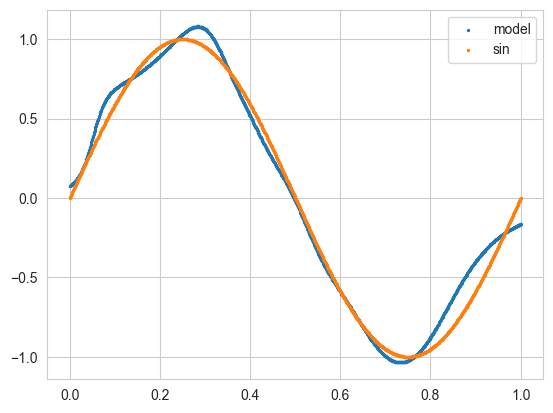

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

X = np.linspace(0, 1, 1000).reshape(-1, 1)
plt.scatter(X, model(X).data, s=2, label='model')
plt.scatter(X, np.sin(2 * np.pi * X), s=2, label='sin')
plt.legend()

Text(0, 0.5, 'loss')

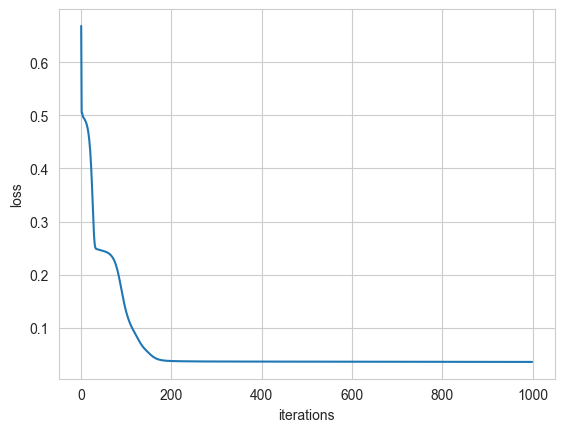

In [64]:
plt.plot(losses)
plt.xlabel('iterations')
plt.ylabel('loss')

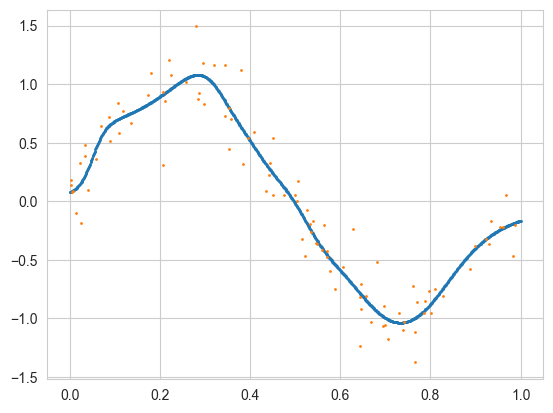

In [65]:
plt.scatter(X, model(X).data, s=1)
plt.scatter(x, y, s=1)

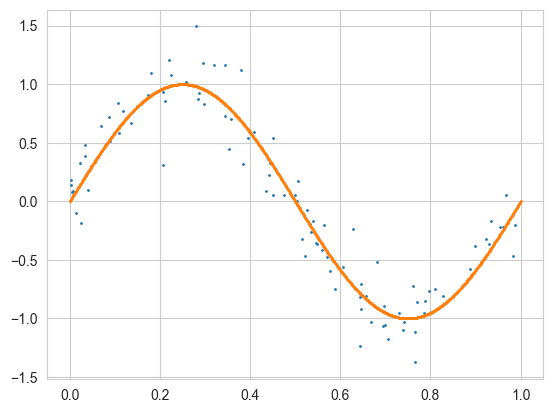

In [68]:
plt.scatter(x, y, s=1)
plt.scatter(X, np.sin(2 * np.pi * X), s=1)